# Random Forests (Iris)
**K-Fold Cross Validation**


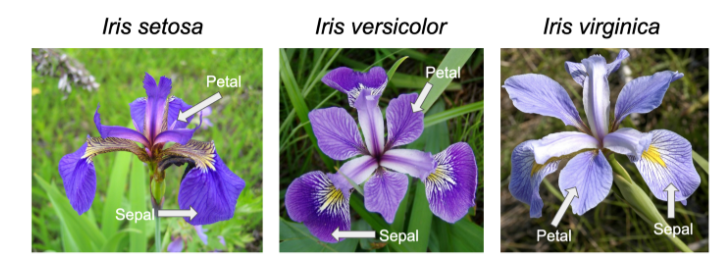

The following code loads up the iris data and completes the feature engineering from the last class.

In [21]:
import pandas as pd
df = pd.read_csv('iris.csv')

In [22]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
species         0
dtype: int64

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


In [24]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,target
species,,,,,
Setosa,5.006,3.428,1.462,0.246,0
Versicolor,5.936,2.770,4.260,1.326,1
Virginica,6.588,2.974,5.552,2.026,2


In [25]:
df['species'].value_counts()

Versicolor    50
Setosa        50
Virginica     50
Name: species, dtype: int64

In [27]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]

y = df['target']

### Random forests with k-fold cross validation

In [32]:
# generate 100 decision trees
# verbose 0 (silent), 1 (progress bar) or 2 (one line per tree) you just say how do you want to 'see' the training progress
# bootstrap=True , you are drawing with replacement, meaning that some data points might be used more than once and others not.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold



clf = RandomForestClassifier(n_estimators=100, verbose=0, bootstrap=True, max_depth=2, random_state=0) 
clf = clf.fit(X,y)

kf =KFold(n_splits=5, shuffle=True, random_state=0)
CVscores= cross_val_score(clf, X, y, scoring='accuracy', cv=kf)

print('Cross validation scores ', CVscores)
print('Cross validation scores mean:', CVscores.mean())

# or print("Cross validation scores mean: {:.2f}".format(CVscores.mean()))

Cross validation scores  [0.96666667 0.9        1.         1.         0.9       ]
Cross validation scores mean: 0.9533333333333334


**Feature importance**

In [33]:
#['sepal_length','sepal_width','petal_length','petal_width']

print(clf.feature_importances_)

[0.10144835 0.00635724 0.46628917 0.42590525]


**Confusion Matrix**

In [34]:
# Store the prediction of each iris
predictions= clf.predict(X)

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, predictions)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)